<a href="https://colab.research.google.com/github/cangelo21/CodeCamp/blob/main/Build_withAI_Manila_python_quickstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2024 Google LLC.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Get started with the Gemini API: Python

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://ai.google.dev/gemini-api/docs/get-started/python"><img src="https://ai.google.dev/static/site-assets/images/docs/notebook-site-button.png" height="32" width="32" />View on Google AI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/get-started/python.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/get-started/python.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

This quickstart demonstrates how to use the Python SDK for the Gemini API, which gives you access to Google's Gemini large language models. In this quickstart, you will learn how to:

1. Set up your development environment and API access to use Gemini.
2. Generate text responses from text inputs.
3. Generate text responses from multimodal inputs (text and images).
4. Use Gemini for multi-turn conversations (chat).
5. Use embeddings for large language models.

## Prerequisites

You can run this quickstart in [Google Colab](https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/python_quickstart.ipynb), which runs this notebook directly in the browser and does not require additional environment configuration.

Alternatively, to complete this quickstart locally, ensure that your development environment meets the following requirements:

-  Python 3.9+
-  An installation of `jupyter` to run the notebook.

## Setup

### Install the Python SDK

The Python SDK for the Gemini API, is contained in the [`google-generativeai`](https://pypi.org/project/google-generativeai/) package. Install the dependency using pip:

In [ ]:
!pip install -q -U google-generativeai

### Import packages

Import the necessary packages.

In [ ]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [ ]:
# Used to securely store your API key
from google.colab import userdata

### Setup your API key

Before you can use the Gemini API, you must first obtain an API key. If you don't already have one, create a key with one click in Google AI Studio.

<a class="button button-primary" href="https://makersuite.google.com/app/apikey" target="_blank" rel="noopener noreferrer">Get an API key</a>

In Colab, add the key to the secrets manager under the "🔑" in the left panel. Give it the name `GOOGLE_API_KEY`.

Once you have the API key, pass it to the SDK. You can do this in two ways:

* Put the key in the `GOOGLE_API_KEY` environment variable (the SDK will automatically pick it up from there).
* Pass the key to `genai.configure(api_key=...)`

In [ ]:
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

## List models

Now you're ready to call the Gemini API. Use `list_models` to see the available Gemini models:

* `gemini-pro`: optimized for text-only prompts.
* `gemini-pro-vision`: optimized for text-and-images prompts.

In [ ]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


Note: For detailed information about the available models, including their capabilities and rate limits, see [Gemini models](https://ai.google.dev/models/gemini). There are options for requesting [rate limit increases](https://ai.google.dev/docs/increase_quota). The rate limit for Gemini-Pro models is 60 requests per minute (RPM).

The `genai` package also supports the PaLM  family of models, but only the Gemini models support the generic, multimodal capabilities of the `generateContent` method.

## Generate text from text inputs

For text-only prompts, use the `gemini-pro` model:

In [ ]:
model = genai.GenerativeModel('gemini-1.5-pro-latest')

The `generate_content` method can handle a wide variety of use cases, including multi-turn chat and multimodal input, depending on what the underlying model supports. The available models only support text and images as input, and text as output.

In the simplest case, you can pass a prompt string to the <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content</code></a> method:

In [ ]:
%%time
response = model.generate_content("Can you prepare 5 days and 3 nights HongKong Itinerary?")

CPU times: user 324 ms, sys: 40.4 ms, total: 364 ms
Wall time: 23.8 s


In simple cases, the `response.text` accessor is all you need. To display formatted Markdown text, use the `to_markdown` function:

In [ ]:
to_markdown(response.text)

> ## 5-Day Hong Kong Itinerary: A Blend of Culture, Views, and Excitement 
> 
> This itinerary offers a mix of iconic sights, cultural experiences, and breathtaking views, perfect for first-time visitors. Feel free to adjust it based on your interests and pace.
> 
> **Day 1: Kowloon & Victoria Harbour Lights**
> 
> *   **Morning:** Arrive at Hong Kong International Airport (HKG) and take the Airport Express train to Kowloon Station. Check into your hotel and leave your luggage.
> *   **Afternoon:** Explore the vibrant Tsim Sha Tsui area. Visit the Avenue of Stars, a waterfront promenade honoring Hong Kong film stars. 
> *   **Evening:** Enjoy the Symphony of Lights show at 8:00 PM, a dazzling light and sound spectacle over Victoria Harbour.  Dine at a restaurant with harbor views. 
> 
> **Day 2: Island Exploration & Peak Views**
> 
> *   **Morning:** Take the Star Ferry across Victoria Harbour to Hong Kong Island. Enjoy the iconic skyline views.
> *   **Afternoon:** Head up to Victoria Peak via the Peak Tram for panoramic vistas of the city. Explore the Peak Tower and enjoy lunch with a view. 
> *   **Evening:** Visit the Temple Street Night Market in Kowloon for souvenirs and street food. 
> 
> **Day 3: Culture & History**
> 
> *   **Morning:** Immerse yourself in history at the Hong Kong Museum of History, showcasing the city's rich past.
> *   **Afternoon:** Take a walk through the Nan Lian Garden and Chi Lin Nunnery, experiencing tranquil traditional Chinese architecture and landscaping.
> *   **Evening:** Head to Lan Kwai Fong for dinner and experience the bustling nightlife scene.
> 
> **Day 4: Island Escape & Local Life**
> 
> *   **Morning:** Take a ferry to Lamma Island for a relaxing escape from the city. Enjoy the beaches, hiking trails, and fresh seafood. 
> *   **Afternoon:** Visit the fishing village of Sok Kwu Wan and experience local life. Have a delicious seafood lunch at a waterfront restaurant. 
> *   **Evening:** Return to Hong Kong Island and explore the Soho area, known for its trendy restaurants and bars. 
> 
> **Day 5: Shopping & Departure**
> 
> *   **Morning:** Enjoy some retail therapy in Causeway Bay, a shopping paradise with numerous malls and department stores. 
> *   **Afternoon:** Visit the Ladies' Market in Mong Kok for bargain shopping and souvenirs. 
> *   **Evening:** Depart from Hong Kong International Airport (HKG) with unforgettable memories.
> 
> **Additional Options:**
> 
> *   **Disneyland Hong Kong:** Spend a day at the magical Disneyland Hong Kong, experiencing thrilling rides and enchanting shows. 
> *   **Ocean Park Hong Kong:** Enjoy marine animal encounters, exciting rides, and panoramic views at Ocean Park Hong Kong. 
> *   **Ngong Ping 360:** Take a scenic cable car ride on the Ngong Ping 360 for stunning views of Lantau Island and the Big Buddha statue.
> 
> **Tips:**
> 
> *   Purchase an Octopus card for convenient travel on public transportation.
> *   Pack comfortable walking shoes and weather-appropriate clothing.
> *   Be sure to try Hong Kong's famous dim sum and other local delicacies.
> *   Learn some basic Cantonese phrases to enhance your experience.
> 
> **I hope this itinerary helps you plan a fantastic trip to Hong Kong! Have a wonderful time!** 


If the API failed to return a result, use `GenerateContentResponse.prompt_feedback` to see if it was blocked due to safety concerns regarding the prompt.

In [ ]:
response.candidates[0].safety_ratings
#response.prompt_feedback

[category: HARM_CATEGORY_SEXUALLY_EXPLICIT
probability: NEGLIGIBLE
, category: HARM_CATEGORY_HATE_SPEECH
probability: NEGLIGIBLE
, category: HARM_CATEGORY_HARASSMENT
probability: NEGLIGIBLE
, category: HARM_CATEGORY_DANGEROUS_CONTENT
probability: NEGLIGIBLE
]

Gemini can generate multiple possible responses for a single prompt. These possible responses are called `candidates`, and you can review them to select the most suitable one as the response.

View the response candidates with <a href="https://ai.google.dev/api/python/google/ai/generativelanguage/GenerateContentResponse#candidates"><code>GenerateContentResponse.candidates</code></a>:

In [ ]:
response.candidates

[content {
  parts {
    text: "## 5-Day Hong Kong Itinerary: A Blend of Culture, Views, and Excitement \n\nThis itinerary offers a mix of iconic sights, cultural experiences, and breathtaking views, perfect for first-time visitors. Feel free to adjust it based on your interests and pace.\n\n**Day 1: Kowloon & Victoria Harbour Lights**\n\n*   **Morning:** Arrive at Hong Kong International Airport (HKG) and take the Airport Express train to Kowloon Station. Check into your hotel and leave your luggage.\n*   **Afternoon:** Explore the vibrant Tsim Sha Tsui area. Visit the Avenue of Stars, a waterfront promenade honoring Hong Kong film stars. \n*   **Evening:** Enjoy the Symphony of Lights show at 8:00 PM, a dazzling light and sound spectacle over Victoria Harbour.  Dine at a restaurant with harbor views. \n\n**Day 2: Island Exploration & Peak Views**\n\n*   **Morning:** Take the Star Ferry across Victoria Harbour to Hong Kong Island. Enjoy the iconic skyline views.\n*   **Afternoon:** He

By default, the model returns a response after completing the entire generation process. You can also stream the response as it is being generated, and the model will return chunks of the response as soon as they are generated.

To stream responses, use <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content(..., stream=True)</code></a>.

In [ ]:
%%time
response = model.generate_content("What is the meaning of life?", stream=True)

CPU times: user 203 ms, sys: 19.3 ms, total: 222 ms
Wall time: 14.1 s


In [ ]:
for chunk in response:
  print(chunk.text)
  print("_"*80)

The
________________________________________________________________________________
 meaning of life is a complex and multifaceted question that has been pondered by philosophers and
________________________________________________________________________________
 theologians for centuries. There is no one definitive answer, as the meaning of life
________________________________________________________________________________
 is ultimately subjective and can vary greatly from person to person. 

Here are a few perspectives on the meaning of life:

* **Philosophical:**  
________________________________________________________________________________
Philosophers throughout history have offered various perspectives. Some, like the Stoics, emphasized finding meaning through virtue and living in accordance with nature. Others, like the
________________________________________________________________________________
 Existentialists, argued that life has no inherent meaning and that ind

When streaming, some response attributes are not available until you've iterated through all the response chunks. This is demonstrated below:

In [ ]:
response = model.generate_content("What is the meaning of life?", stream=True)

The `prompt_feedback` attribute works:

In [ ]:
response.prompt_feedback

But attributes like <code>text</code> do not:

In [ ]:
try:
  response.text
except Exception as e:
  print(f'{type(e).__name__}: {e}')

IncompleteIterationError: Please let the response complete iteration before accessing the final accumulated
attributes (or call `response.resolve()`)


## Generate text from image and text inputs

Gemini provides a multimodal model (`gemini-pro-vision`) that accepts both text and images and inputs. The `GenerativeModel.generate_content` API is designed to handle multimodal prompts and returns a text output.

Let's include an image:

In [71]:
#!curl -o image.jpg https://t0.gstatic.com/licensed-image?q=tbn:ANd9GcQ_Kevbk21QBRy-PgB4kQpS79brbmmEG7m3VOTShAn4PecDU5H5UxrJxE3Dw1JiaG17V88QIol19-3TM2wCHw
#!curl -o image.jpg https://www.vacationstravel.com/wp-content/uploads/2019/04/5c157eb9-bd22-40a5-81d7-8384a8c1797b700px.jpg
!curl -o image.jpg https://www.deeperblue.com/upload/956525013_WillWinram_GWS_by%20Fred%20Buyle_1.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15073  100 15073    0     0  83779      0 --:--:-- --:--:-- --:--:-- 84206


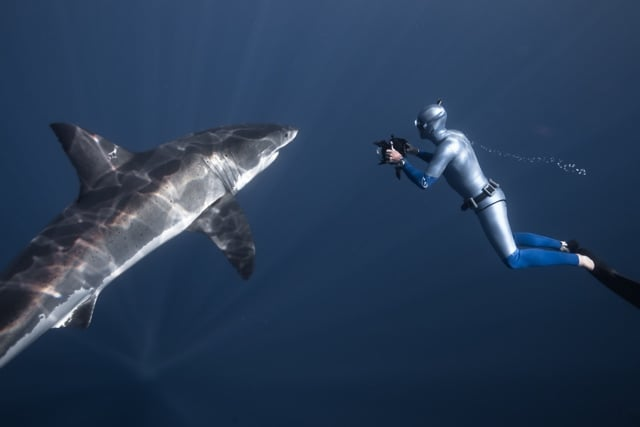

In [72]:
import PIL.Image

img = PIL.Image.open('image.jpg')
img

Use the `gemini-pro-vision` model and pass the image to the model with `generate_content`.

In [73]:
model = genai.GenerativeModel('gemini-pro-vision')

In [74]:
response = model.generate_content(img)

to_markdown(response.text)

>  A freediver swims next to a great white shark.

To provide both text and images in a prompt, pass a list containing the strings and images:

In [75]:
response = model.generate_content(["Write a short and engaging social media travel post about this picture.", img], stream=True)
response.resolve()

In [76]:
to_markdown(response.text)

>  **Caption:** This incredible shot was taken by a freediver off the coast of South Africa. The diver was able to get incredibly close to this great white shark, capturing this amazing photo. These creatures are truly awe-inspiring!
> 
> **Hashtags:** #shark #greatwhiteshark #freediving #southafrica #ocean #marinelife #wildlife #nature #photography #underwaterphotography #freediver #sharkphotography

## Chat conversations

Gemini enables you to have freeform conversations across multiple turns. The `ChatSession` class simplifies the process by managing the state of the conversation, so unlike with `generate_content`, you do not have to store the conversation history as a list.

Initialize the chat:

In [ ]:
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])
chat

ChatSession(
    model=genai.GenerativeModel(
        model_name='models/gemini-pro',
        generation_config={},
        safety_settings={},
        tools=None,
        system_instruction=None,
    ),
    history=[]
)

Note: The vision model `gemini-pro-vision` is not optimized for multi-turn chat.

The `ChatSession.send_message` method returns the same `GenerateContentResponse` type as <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content</code></a>. It also appends your message and the response to the chat history:

In [ ]:
response = chat.send_message("In one sentence, explain how a computer works to a young child.")
to_markdown(response.text)

> A computer is like a magic box that thinks and does things when you tell it what to do, using a special language.

In [ ]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "A computer is like a magic box that thinks and does things when you tell it what to do, using a special language."
 }
 role: "model"]

You can keep sending messages to continue the conversation. Use the `stream=True` argument to stream the chat:

In [ ]:
response = chat.send_message("Okay, how about a more detailed explanation to a high schooler?", stream=True)

for chunk in response:
  print(chunk.text)
  print("_"*80)

A computer is an electronic device that can be programmed to carry out a set of
________________________________________________________________________________
 instructions. It consists of hardware, which are the physical components, and software, which are the instructions that tell the hardware what to do. The hardware includes the
________________________________________________________________________________
 central processing unit (CPU), which is the "brain" of the computer, memory, storage devices, input devices (such as the keyboard and mouse), and output devices (such as the monitor and printer). The software includes the operating system, which manages the hardware and provides basic services, and applications, which are programs
________________________________________________________________________________
 that perform specific tasks. When you give a computer a command, the CPU fetches the instructions from memory and executes them. The results of the instructions are 

`glm.Content` objects contain a list of `glm.Part` objects that each contain either a text (string) or inline_data (`glm.Blob`), where a blob contains binary data and a `mime_type`. The chat history is available as a list of `glm.Content` objects in `ChatSession.history`:

In [ ]:
for message in chat.history:
  display(to_markdown(f'**{message.role}**: {message.parts[0].text}'))

> **user**: In one sentence, explain how a computer works to a young child.

> **model**: A computer is like a magic box that thinks and does things when you tell it what to do, using a special language.

> **user**: Okay, how about a more detailed explanation to a high schooler?

> **model**: A computer is an electronic device that can be programmed to carry out a set of instructions. It consists of hardware, which are the physical components, and software, which are the instructions that tell the hardware what to do. The hardware includes the central processing unit (CPU), which is the "brain" of the computer, memory, storage devices, input devices (such as the keyboard and mouse), and output devices (such as the monitor and printer). The software includes the operating system, which manages the hardware and provides basic services, and applications, which are programs that perform specific tasks. When you give a computer a command, the CPU fetches the instructions from memory and executes them. The results of the instructions are stored in memory or sent to an output device. Computers are used for a wide variety of tasks, including word processing, spreadsheets, presentations, games, and scientific research.
> 
> Here is a simplified analogy that may be helpful for a high schooler:
> 
> Imagine a computer as a kitchen. The hardware is like the appliances in the kitchen, such as the oven, stove, refrigerator, and dishwasher. The software is like the recipes that you use to tell the appliances what to do. When you want to bake a cake, you follow the recipe and use the appliances to mix the ingredients, bake the cake, and clean up the dishes. Similarly, when you want to use a computer, you give it instructions using software, and the hardware carries out those instructions.

## Count tokens

Large language models have a context window, and the context length is often measured in terms of the **number of tokens**. With the Gemini API, you can determine the number of tokens per any `glm.Content` object. In the simplest case, you can pass a query string to the `GenerativeModel.count_tokens` method as follows:

In [ ]:
model.count_tokens("What is the meaning of life?")

total_tokens: 7

Similarly, you can check `token_count` for your `ChatSession`:

In [ ]:
model.count_tokens(chat.history)

total_tokens: 353

## Use embeddings

[Embedding](https://developers.google.com/machine-learning/glossary#embedding-vector) is a technique used to represent information as a list of floating point numbers in an array. With Gemini, you can represent text (words, sentences, and blocks of text) in a vectorized form, making it easier to compare and contrast embeddings. For example, two texts that share a similar subject matter or sentiment should have similar embeddings, which can be identified through mathematical comparison techniques such as cosine similarity. For more on how and why you should use embeddings, refer to the [Embeddings guide](https://ai.google.dev/docs/embeddings_guide).

Use the `embed_content` method to generate embeddings. The method handles embedding for the following tasks (`task_type`):

Task Type | Description
---       | ---
RETRIEVAL_QUERY	| Specifies the given text is a query in a search/retrieval setting.
RETRIEVAL_DOCUMENT | Specifies the given text is a document in a search/retrieval setting. Using this task type requires a `title`.
SEMANTIC_SIMILARITY	| Specifies the given text will be used for Semantic Textual Similarity (STS).
CLASSIFICATION	| Specifies that the embeddings will be used for classification.
CLUSTERING	| Specifies that the embeddings will be used for clustering.

The following generates an embedding for a single string for document retrieval:

In [ ]:
result = genai.embed_content(
    model="models/embedding-001",
    content="What is the meaning of life?",
    task_type="retrieval_document",
    title="Embedding of single string")

# 1 input > 1 vector output
print(str(result['embedding'])[:50], '... TRIMMED]')

[-0.003216741, -0.013358698, -0.017649598, -0.0091 ... TRIMMED]


Note: The `retrieval_document` task type is the only task that accepts a title.

To handle batches of strings, pass a list of strings in `content`:

In [ ]:
result = genai.embed_content(
    model="models/embedding-001",
    content=[
      'What is the meaning of life?',
      'How much wood would a woodchuck chuck?',
      'How does the brain work?'],
    task_type="retrieval_document",
    title="Embedding of list of strings")

# A list of inputs > A list of vectors output
for v in result['embedding']:
  print(str(v)[:50], '... TRIMMED ...')

[0.0040260437, 0.004124458, -0.014209415, -0.00183 ... TRIMMED ...
[-0.004049845, -0.0075574904, -0.0073463684, -0.03 ... TRIMMED ...
[0.025310587, -0.0080734305, -0.029902633, 0.01160 ... TRIMMED ...


While the `genai.embed_content` function accepts simple strings or lists of strings, it is actually built around the `glm.Content` type (like <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content</code></a>). `glm.Content` objects are the primary units of conversation in the API.

While the `glm.Content` object is multimodal, the `embed_content` method only supports text embeddings. This design gives the API the *possibility* to expand to multimodal embeddings.

In [77]:
response.candidates[0].content

parts {
  text: " **Caption:** This incredible shot was taken by a freediver off the coast of South Africa. The diver was able to get incredibly close to this great white shark, capturing this amazing photo. These creatures are truly awe-inspiring!\n\n**Hashtags:** #shark #greatwhiteshark #freediving #southafrica #ocean #marinelife #wildlife #nature #photography #underwaterphotography #freediver #sharkphotography"
}
role: "model"

In [78]:
result = genai.embed_content(
    model = 'models/embedding-001',
    content = response.candidates[0].content)

# 1 input > 1 vector output
print(str(result['embedding'])[:50], '... TRIMMED ...')

[0.025504319, -0.05346806, -0.023914713, -0.041647 ... TRIMMED ...


Similarly, the chat history contains a list of `glm.Content` objects, which you can pass directly to the `embed_content` function:

In [79]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "A computer is like a magic box that thinks and does things when you tell it what to do, using a special language."
 }
 role: "model",
 parts {
   text: "Okay, how about a more detailed explanation to a high schooler?"
 }
 role: "user",
 parts {
   text: "A computer is an electronic device that can be programmed to carry out a set of instructions. It consists of hardware, which are the physical components, and software, which are the instructions that tell the hardware what to do. The hardware includes the central processing unit (CPU), which is the \"brain\" of the computer, memory, storage devices, input devices (such as the keyboard and mouse), and output devices (such as the monitor and printer). The software includes the operating system, which manages the hardware and provides basic services, and applications, which are programs that perform specific tasks. When

In [80]:
result = genai.embed_content(
    model = 'models/embedding-001',
    content = chat.history)

# 1 input > 1 vector output
for i,v in enumerate(result['embedding']):
  print(str(v)[:50], '... TRIMMED...')

[-0.014632266, -0.042202696, -0.015757175, 0.01548 ... TRIMMED...
[-0.040856175, -0.025372045, -0.006198547, 0.01087 ... TRIMMED...
[-0.010055617, -0.07208932, -0.00011750793, -0.023 ... TRIMMED...
[-0.027233306, -0.044427674, 0.016031835, 0.014880 ... TRIMMED...


## Advanced use cases

The following sections discuss advanced use cases and lower-level details of the Python SDK for the Gemini API.

### Safety settings

The `safety_settings` argument lets you configure what the model blocks and allows in both prompts and responses. By default, safety settings block content with medium and/or high probability of being unsafe content across all dimensions. Learn more about [Safety settings](https://ai.google.dev/docs/safety_setting).

Enter a questionable prompt and run the model with the default safety settings, and it will not return any candidates:

In [91]:
response = model.generate_content('[How is the Weather today?]')
response.candidates

BadRequest: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro-vision:generateContent?%24alt=json%3Benum-encoding%3Dint: Add an image to use models/gemini-pro-vision, or switch your model to a text model.

The `prompt_feedback` will tell you which safety filter blocked the prompt:

In [ ]:
response.prompt_feedback

Now provide the same prompt to the model with newly configured safety settings, and you may get a response.

In [ ]:
response = model.generate_content('[Questionable prompt here]',
                                  safety_settings={'HARASSMENT':'block_none'})
response.text

Also note that each candidate has its own `safety_ratings`, in case the prompt passes but the individual responses fail the safety checks.

### Encode messages

The previous sections relied on the SDK to make it easy for you to send prompts to the API. This section offers a fully-typed equivalent to the previous example, so you can better understand the lower-level details regarding how the SDK encodes messages.

Underlying the Python SDK is the <a href="https://ai.google.dev/api/python/google/ai/generativelanguage"><code>google.ai.generativelanguage</code></a> client library:

In [89]:
import google.ai.generativelanguage as glm

The SDK attempts to convert your message to a `glm.Content` object, which contains a list of `glm.Part` objects that each contain either:

1. a <a href="https://www.tensorflow.org/text/api_docs/python/text"><code>text</code></a> (string)
2. `inline_data` (`glm.Blob`), where a blob contains binary `data` and a `mime_type`.

You can also pass any of these classes as an equivalent dictionary.

Note: The only accepted mime types are some image types, `image/*`.

So, the fully-typed equivalent to the previous example is:  

In [90]:
model = genai.GenerativeModel('gemini-pro-vision')
response = model.generate_content(
    glm.Content(
        parts = [
            glm.Part(text="Write a short, engaging blog post based on this picture."),
            glm.Part(
                inline_data=glm.Blob(
                    mime_type='image/jpeg',
                    data=pathlib.Path('image.jpg').read_bytes()
                )
            ),
        ],
    ),
    stream=True)

In [ ]:
response.resolve()

to_markdown(response.text[:100] + "... [TRIMMED] ...")

>  Meal prepping is a great way to save time and money, and it can also help you to eat healthier. By ... [TRIMMED] ...

### Multi-turn conversations

While the `genai.ChatSession` class shown earlier can handle many use cases, it does make some assumptions. If your use case doesn't fit into this chat implementation it's good to remember that `genai.ChatSession` is just a wrapper around <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content</code></a>. In addition to single requests, it can handle multi-turn conversations.

The individual messages are `glm.Content` objects or compatible dictionaries, as seen in previous sections. As a dictionary, the message requires `role` and `parts` keys. The `role` in a conversation can either be the `user`, which provides the prompts, or `model`, which provides the responses.

Pass a list of `glm.Content` objects and it will be treated as multi-turn chat:

In [ ]:
model = genai.GenerativeModel('gemini-pro')

messages = [
    {'role':'user',
     'parts': ["Briefly explain how a computer works to a young child."]}
]
response = model.generate_content(messages)

to_markdown(response.text)

> Imagine a computer as a really smart friend who can help you with many things. Just like you have a brain to think and learn, a computer has a brain too, called a processor. It's like the boss of the computer, telling it what to do.
> 
> Inside the computer, there's a special place called memory, which is like a big storage box. It remembers all the things you tell it to do, like opening games or playing videos.
> 
> When you press buttons on the keyboard or click things on the screen with the mouse, you're sending messages to the computer. These messages travel through special wires, called cables, to the processor.
> 
> The processor reads the messages and tells the computer what to do. It can open programs, show you pictures, or even play music for you.
> 
> All the things you see on the screen are created by the graphics card, which is like a magic artist inside the computer. It takes the processor's instructions and turns them into colorful pictures and videos.
> 
> To save your favorite games, videos, or pictures, the computer uses a special storage space called a hard drive. It's like a giant library where the computer can keep all your precious things safe.
> 
> And when you want to connect to the internet to play games with friends or watch funny videos, the computer uses something called a network card to send and receive messages through the internet cables or Wi-Fi signals.
> 
> So, just like your brain helps you learn and play, the computer's processor, memory, graphics card, hard drive, and network card all work together to make your computer a super-smart friend that can help you do amazing things!

To continue the conversation, add the response and another message.

Note: For multi-turn conversations, you need to send the whole conversation history with each request. The API is **stateless**.

In [ ]:
messages.append({'role':'model',
                 'parts':[response.text]})

messages.append({'role':'user',
                 'parts':["Okay, how about a more detailed explanation to a high school student?"]})

response = model.generate_content(messages)

to_markdown(response.text)

> At its core, a computer is a machine that can be programmed to carry out a set of instructions. It consists of several essential components that work together to process, store, and display information:
> 
> **1. Processor (CPU):**
>    - The brain of the computer.
>    - Executes instructions and performs calculations.
>    - Speed measured in gigahertz (GHz).
>    - More GHz generally means faster processing.
> 
> **2. Memory (RAM):**
>    - Temporary storage for data being processed.
>    - Holds instructions and data while the program is running.
>    - Measured in gigabytes (GB).
>    - More GB of RAM allows for more programs to run simultaneously.
> 
> **3. Storage (HDD/SSD):**
>    - Permanent storage for data.
>    - Stores operating system, programs, and user files.
>    - Measured in gigabytes (GB) or terabytes (TB).
>    - Hard disk drives (HDDs) are traditional, slower, and cheaper.
>    - Solid-state drives (SSDs) are newer, faster, and more expensive.
> 
> **4. Graphics Card (GPU):**
>    - Processes and displays images.
>    - Essential for gaming, video editing, and other graphics-intensive tasks.
>    - Measured in video RAM (VRAM) and clock speed.
> 
> **5. Motherboard:**
>    - Connects all the components.
>    - Provides power and communication pathways.
> 
> **6. Input/Output (I/O) Devices:**
>    - Allow the user to interact with the computer.
>    - Examples: keyboard, mouse, monitor, printer.
> 
> **7. Operating System (OS):**
>    - Software that manages the computer's resources.
>    - Provides a user interface and basic functionality.
>    - Examples: Windows, macOS, Linux.
> 
> When you run a program on your computer, the following happens:
> 
> 1. The program instructions are loaded from storage into memory.
> 2. The processor reads the instructions from memory and executes them one by one.
> 3. If the instruction involves calculations, the processor performs them using its arithmetic logic unit (ALU).
> 4. If the instruction involves data, the processor reads or writes to memory.
> 5. The results of the calculations or data manipulation are stored in memory.
> 6. If the program needs to display something on the screen, it sends the necessary data to the graphics card.
> 7. The graphics card processes the data and sends it to the monitor, which displays it.
> 
> This process continues until the program has completed its task or the user terminates it.

### Generation configuration

The `generation_config` argument allows you to modify the generation parameters. Every prompt you send to the model includes parameter values that control how the model generates responses.

In [ ]:
model = genai.GenerativeModel('gemini-pro')
response = model.generate_content(
    'Tell me a story about a magic backpack.',
    generation_config=genai.types.GenerationConfig(
        # Only one candidate for now.
        candidate_count=1,
        stop_sequences=['x'],
        max_output_tokens=20,
        temperature=1.0)
)

In [ ]:
text = response.text

if response.candidates[0].finish_reason.name == "MAX_TOKENS":
    text += '...'

to_markdown(text)

> Once upon a time, in a small town nestled amidst lush green hills, lived a young girl named...

## What's next

-   Prompt design is the process of creating prompts that elicit the desired response from language models. Writing well structured prompts is an essential part of ensuring accurate, high quality responses from a language model. Learn about best practices for [prompt writing](https://ai.google.dev/docs/prompt_best_practices).
-   Gemini offers several model variations to meet the needs of different use cases, such as input types and complexity, implementations for chat or other dialog language tasks, and size constraints. Learn about the available [Gemini models](https://ai.google.dev/models/gemini).
-   Gemini offers options for requesting [rate limit increases](https://ai.google.dev/docs/increase_quota). The rate limit for Gemini-Pro models is 60 requests per minute (RPM).